In [ ]:
#!pip install tensorflow-gpu
#!pip uninstall tf-nightly
#!pip install tf-nightly

In [3]:
import numpy as np

In [197]:
#import library

#from google.colab import files
import tensorflow as tf 
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from keras.metrics import RootMeanSquaredError as rmse
from sklearn.metrics import mean_squared_error
import random as python_random
import datetime

In [107]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [286]:
currency_pair=str(input("enter the currency pair from the following list [USDINR, USDAUD, USDCAD, USDCNY, USDGBP : "))

enter the currency pair from the following list [USDINR, USDAUD, USDCAD, USDCNY, USDGBP : USDGBP


In [287]:
currency_pair

'USDGBP'

In [288]:
# download the past 11 years of historical data
df_pair = pdr.get_data_yahoo(currency_pair+'=X', start='2010-01-01', interval='1D')
df_pair.drop('Volume', axis=1,inplace=True)
display(df_pair.tail())
display(len(df_pair)) 

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close
Date,,,,,
2023-04-07,0.80379,0.80682,0.80281,0.803923,0.803923
2023-04-10,0.80421,0.80980,0.80368,0.804400,0.804400
2023-04-11,0.80677,0.80725,0.80274,0.806960,0.806960
2023-04-12,0.80450,0.80648,0.80106,0.804440,0.804440
2023-04-13,0.80088,0.80127,0.79827,0.798640,0.798640


3460

In [282]:
#df_pair.to_csv("df_pair.csv")

In [283]:
df_pair

,Open,High,Low,Close,Adj Close
Date,,,,,
2010-01-04,6.8169,6.8169,6.8169,6.8169,6.8169
2010-01-05,6.8170,6.8170,6.8170,6.8170,6.8170
2010-01-06,6.8170,6.8183,6.8170,6.8183,6.8183
2010-01-07,6.8183,6.8183,6.8178,6.8178,6.8178
2010-01-08,6.8180,6.8180,6.8175,6.8175,6.8175
...,...,...,...,...,...
2023-04-07,6.8749,6.8780,6.8652,6.8749,6.8749
2023-04-10,6.8693,6.8811,6.8691,6.8693,6.8693
2023-04-11,6.8811,6.8909,6.8809,6.8811,6.8811


In [270]:
df_pair.reset_index(inplace=True)

<AxesSubplot:>

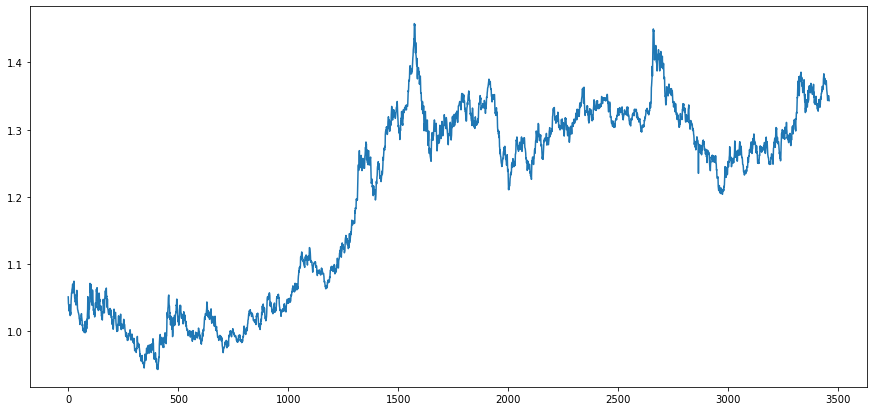

In [186]:
df_pair1 = df_pair["Close"]

#plotting dataset to visualize the pattern of prices over the years

df_pair1.plot(kind='line',figsize=(15,7))


<AxesSubplot:>

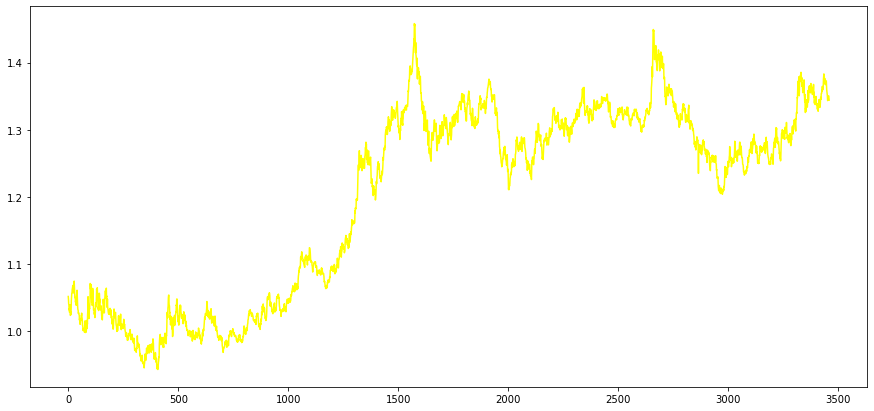

In [193]:
df_pair2 = df_pair["Open"]

#plotting dataset to visualize the pattern of prices over the years

df_pair2.plot(kind='line',color='yellow', figsize=(15,7))

<AxesSubplot:>

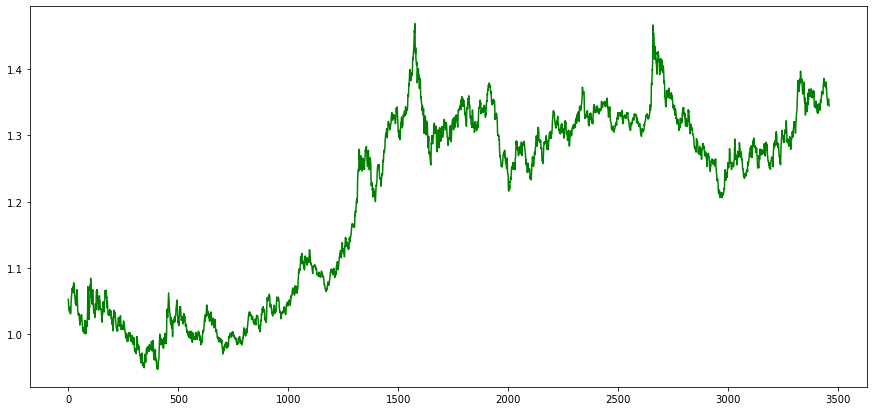

In [191]:
df_pair3 = df_pair["High"]

#plotting dataset to visualize the pattern of prices over the years

df_pair3.plot(kind='line', color='green', figsize=(15,7))

<AxesSubplot:>

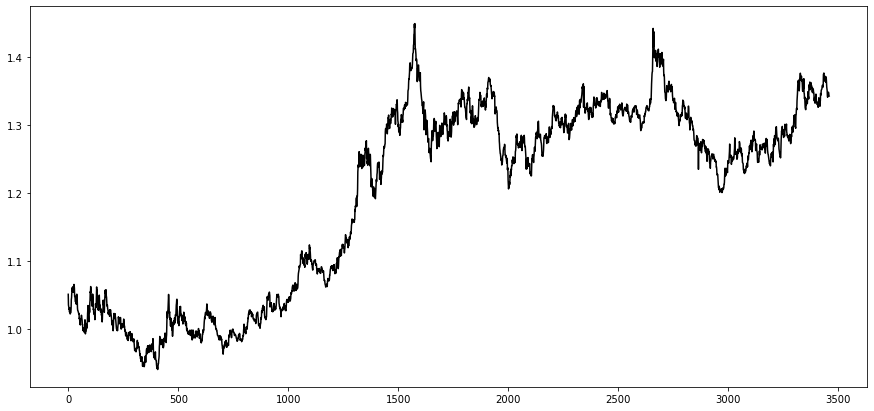

In [192]:
df_pair4 = df_pair["Low"]

#plotting dataset to visualize the pattern of prices over the years

df_pair4.plot(kind='line', color='black', figsize=(15,7))

In [153]:
arr_close = df_pair['Close'].to_numpy()
arr_date = df_pair['Date'].to_numpy()
arr_shiftclose = df_pair['Adj Close'].to_numpy()
#df_USDGBP

In [212]:
arr_close

array([1.05120003, 1.04100001, 1.0395    , ..., 1.35034001, 1.34625006,
       1.34309995])

In [214]:
arr_close[-1]
#some_list[-1]

1.3430999517440796

In [154]:
#normalize data
scaler = MinMaxScaler()
scaled_dataX = scaler.fit_transform(arr_close.reshape(-1,1))
scaled_dataY = scaler.fit_transform(arr_shiftclose.reshape(-1,1))
print(scaled_dataX)
print(scaled_dataY)

[[0.20987181]
 [0.19005054]
 [0.18713564]
 ...
 [0.79117759]
 [0.78322976]
 [0.7771083 ]]
[[0.20987181]
 [0.19005054]
 [0.18713564]
 ...
 [0.79117759]
 [0.78322976]
 [0.7771083 ]]


In [155]:
print(scaled_dataY)

[[0.20987181]
 [0.19005054]
 [0.18713564]
 ...
 [0.79117759]
 [0.78322976]
 [0.7771083 ]]


In [156]:
# #split train and test data   ---- main code

# train_x = scaled_dataX[0:2510,:]
# test_x = scaled_dataX[2510:,:]

# train_y = scaled_dataY[0:2510,:]
# test_y = scaled_dataY[2510:,:]

# #split train and test date data

# train_date = arr_date[0:2510]
# test_date = arr_date[2510:]
# print(test_date[len(test_date)-1])

In [157]:

#split train and test data

train_x = scaled_dataX[0:int(len(scaled_dataX)*0.8)]
test_x = scaled_dataX[-int(len(scaled_dataX)*0.2):,:]

train_y = scaled_dataY[0:int(len(scaled_dataX)*0.8)]
test_y = scaled_dataY[-int(len(scaled_dataX)*0.2):,:]

#split train and test date data

train_date = arr_date[0:int(len(scaled_dataX)*0.8)]
test_date = arr_date[-int(len(scaled_dataX)*0.2):]
print(test_date[len(test_date)-1])


2023-04-13T00:00:00.000000000


In [158]:
#reshape input to be [samples, time steps, features]

trainX = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
testX = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))

#print(trainX)
#print(testX)

In [209]:
trainX

array([[[0.20987181]],

       [[0.19005054]],

       [[0.18713564]],

       ...,

       [[0.73602789]],

       [[0.74240186]],

       [[0.73645552]]])

In [159]:
len(trainX)

2767

In [160]:
len(testX)

691

In [161]:
#to not get random result

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(1234)

In [198]:
#Create LSTM

t_steps = 1
n_feature = 1
model = Sequential()
model.add(LSTM(10, input_shape=(t_steps, n_feature), return_sequences=True))
model.add(LSTM(10, input_shape=(t_steps, n_feature), return_sequences=True))
model.add(LSTM(10, input_shape=(t_steps, n_feature), return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(1)) #output layer
model.compile(loss='mean_squared_error', optimizer='adam', metrics = [rmse()])

earlyStop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
#mCheckpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 1, 10)             480       
                                                                 
 lstm_16 (LSTM)              (None, 1, 10)             840       
                                                                 
 lstm_17 (LSTM)              (None, 10)                840       
                                                                 
 dropout_6 (Dropout)         (None, 10)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,171
Trainable params: 2,171
Non-trainable params: 0
_________________________________________________________________


In [199]:

#train model

history = model.fit(trainX, train_y, epochs=100, verbose=1, validation_split=0.33, callbacks=[earlyStop], shuffle=False)

#history = model.fit(trainX, train_y, epochs=100, verbose=1, validation_split=0.33, shuffle=False)

Epoch 1/100
58/58 [==============================] - 9s 35ms/step - loss: 0.1165 - root_mean_squared_error: 0.3413 - val_loss: 0.3117 - val_root_mean_squared_error: 0.5583
Epoch 2/100
58/58 [==============================] - 0s 7ms/step - loss: 0.0716 - root_mean_squared_error: 0.2676 - val_loss: 0.1888 - val_root_mean_squared_error: 0.4345
Epoch 3/100
58/58 [==============================] - 0s 8ms/step - loss: 0.0667 - root_mean_squared_error: 0.2583 - val_loss: 0.1368 - val_root_mean_squared_error: 0.3698
Epoch 4/100
58/58 [==============================] - 0s 8ms/step - loss: 0.0677 - root_mean_squared_error: 0.2601 - val_loss: 0.1150 - val_root_mean_squared_error: 0.3392
Epoch 5/100
58/58 [==============================] - 0s 8ms/step - loss: 0.0638 - root_mean_squared_error: 0.2527 - val_loss: 0.0955 - val_root_mean_squared_error: 0.3090
Epoch 6/100
58/58 [==============================] - 0s 8ms/step - loss: 0.0573 - root_mean_squared_error: 0.2394 - val_loss: 0.0712 - val_root_

Epoch 48/100
58/58 [==============================] - 0s 7ms/step - loss: 0.0021 - root_mean_squared_error: 0.0457 - val_loss: 9.6899e-05 - val_root_mean_squared_error: 0.0098
Epoch 49/100
58/58 [==============================] - 0s 7ms/step - loss: 0.0020 - root_mean_squared_error: 0.0447 - val_loss: 8.2642e-05 - val_root_mean_squared_error: 0.0091
Epoch 50/100
58/58 [==============================] - 0s 7ms/step - loss: 0.0020 - root_mean_squared_error: 0.0447 - val_loss: 1.7212e-04 - val_root_mean_squared_error: 0.0131
Epoch 51/100
58/58 [==============================] - 0s 7ms/step - loss: 0.0020 - root_mean_squared_error: 0.0442 - val_loss: 1.9319e-04 - val_root_mean_squared_error: 0.0139
Epoch 52/100
58/58 [==============================] - 0s 7ms/step - loss: 0.0020 - root_mean_squared_error: 0.0450 - val_loss: 2.1951e-04 - val_root_mean_squared_error: 0.0148
Epoch 53/100
58/58 [==============================] - 1s 9ms/step - loss: 0.0018 - root_mean_squared_error: 0.0419 - val

In [200]:
#test model

test_predict = model.predict(testX, verbose=1)
print(test_predict)

22/22 [==============================] - 2s 3ms/step
[[0.7358404 ]
 [0.7291835 ]
 [0.73044175]
 [0.73673975]
 [0.7276039 ]
 [0.72338897]
 [0.72061336]
 [0.71358603]
 [0.70581704]
 [0.70891154]
 [0.7074686 ]
 [0.7236762 ]
 [0.7127999 ]
 [0.7162296 ]
 [0.7403108 ]
 [0.7258361 ]
 [0.7320499 ]
 [0.7306597 ]
 [0.7299051 ]
 [0.73260194]
 [0.7307101 ]
 [0.7254483 ]
 [0.7333375 ]
 [0.75034493]
 [0.7498534 ]
 [0.7639051 ]
 [0.75871927]
 [0.76314783]
 [0.759594  ]
 [0.7639532 ]
 [0.7512124 ]
 [0.7477204 ]
 [0.7488696 ]
 [0.74327266]
 [0.75382566]
 [0.74340475]
 [0.7324849 ]
 [0.72203606]
 [0.71906954]
 [0.724031  ]
 [0.72517854]
 [0.7379871 ]
 [0.73034114]
 [0.7320832 ]
 [0.72042686]
 [0.72595406]
 [0.72316945]
 [0.7249424 ]
 [0.73482347]
 [0.73243463]
 [0.7520627 ]
 [0.75284666]
 [0.761389  ]
 [0.73722214]
 [0.717302  ]
 [0.72142655]
 [0.7138935 ]
 [0.7036274 ]
 [0.7010004 ]
 [0.7051278 ]
 [0.7098037 ]
 [0.7230509 ]
 [0.72095233]
 [0.7127316 ]
 [0.7177953 ]
 [0.71425176]
 [0.7145079 ]
 [0.71391

In [201]:
#invert value

predictedTest = scaler.inverse_transform(test_predict)
testY = scaler.inverse_transform(test_y)
trainY = scaler.inverse_transform(train_y)

In [202]:

#reshape array to 1d array

trainY = trainY.flatten()
testY = testY.flatten()
predictedTest = predictedTest.flatten()

In [203]:
len(testY)

691

In [204]:
predictedTest

array([1.3218634, 1.3184378, 1.3190854, 1.3223263, 1.317625 , 1.3154559,
       1.3140277, 1.3104115, 1.3064134, 1.3080058, 1.3072634, 1.3156039,
       1.3100069, 1.3117719, 1.3241639, 1.3167152, 1.3199129, 1.3191975,
       1.3188093, 1.320197 , 1.3192234, 1.3165158, 1.3205755, 1.3293276,
       1.3290746, 1.3363056, 1.3336369, 1.3359159, 1.3340871, 1.3363304,
       1.3297739, 1.327977 , 1.3285683, 1.3256881, 1.3311187, 1.3257561,
       1.3201367, 1.3147599, 1.3132331, 1.3157864, 1.3163769, 1.3229681,
       1.3190336, 1.31993  , 1.3139317, 1.316776 , 1.315343 , 1.3162555,
       1.3213402, 1.3201108, 1.3302114, 1.3306149, 1.3350108, 1.3225746,
       1.3123237, 1.3144461, 1.3105696, 1.3052866, 1.3039348, 1.3060588,
       1.308465 , 1.315282 , 1.3142021, 1.3099717, 1.3125775, 1.310754 ,
       1.3108858, 1.3105785, 1.3098925, 1.302981 , 1.3034804, 1.3051178,
       1.3017483, 1.3025883, 1.2972931, 1.2958659, 1.2910877, 1.2832794,
       1.2853475, 1.2866546, 1.287408 , 1.279532 , 

In [205]:
#calculate RMSE
mse = mean_squared_error(testY,predictedTest, squared=False)
print(mse)

0.00567358543971556


In [206]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

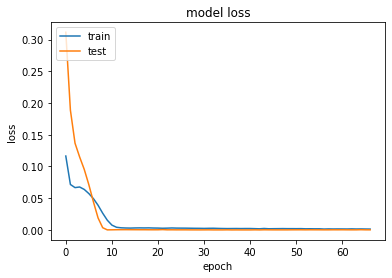

In [207]:
#loss visualization in training and validation
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()  

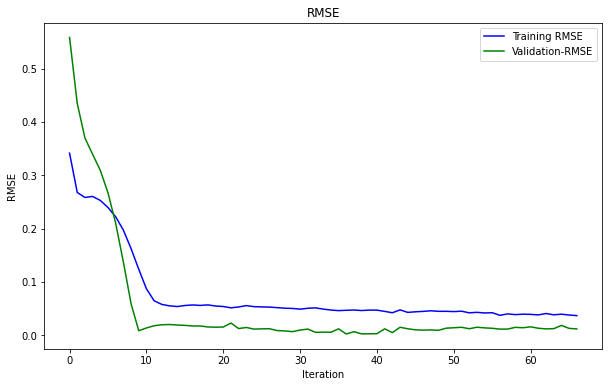

In [208]:
### Plotting iteration-rmse graph for training as well as validation
plt.figure(figsize = (10,6))
plt.plot(history.history['root_mean_squared_error'],label='Training RMSE',color='b')
plt.plot(history.history['val_root_mean_squared_error'],label='Validation-RMSE',color='g')
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.title('RMSE')
plt.legend()

In [171]:

#convert string to datetime

def to_datetime(test_date):
  test_datetime = []
  for i in test_date:
    #date = datetime.datetime.strptime(test_date[i], "%Y.%m.%d")
    #date = datetime.datetime.strptime(test_date[i], "%Y-%m-%d")
    x = pd.to_datetime(i)

    str(x.date())
    test_datetime.append(str(x.date()))
    #test_datetime.append(date)
  return test_datetime

#timestamp = pd.to_datetime(T[1:]).strftime("%Y%m%d %I:%M:%S")
test_datetime = to_datetime(test_date)

In [172]:
len(test_datetime)

691

In [173]:
test_datetime = test_datetime[-100:]

In [175]:
testY = testY[-100:]

In [176]:
testY

array([1.33366001, 1.34096003, 1.34898996, 1.35836005, 1.34119999,
       1.34354997, 1.34440005, 1.35880005, 1.36494005, 1.36489999,
       1.35977006, 1.36553001, 1.36302996, 1.35554004, 1.35502005,
       1.36582005, 1.36886001, 1.36430001, 1.35994005, 1.36126995,
       1.36368001, 1.35897005, 1.35570002, 1.35249996, 1.35994005,
       1.35520005, 1.35281003, 1.35590005, 1.36740994, 1.34851003,
       1.35599005, 1.34352005, 1.33937001, 1.34328997, 1.34300005,
       1.33759999, 1.33961999, 1.33977997, 1.33899999, 1.34958005,
       1.34638   , 1.33710003, 1.33701003, 1.33747995, 1.33801997,
       1.33160996, 1.33032   , 1.33837998, 1.33060002, 1.32749999,
       1.33166003, 1.33996999, 1.3441    , 1.33901   , 1.34449995,
       1.34486997, 1.33573997, 1.33331001, 1.33405995, 1.33905995,
       1.34730005, 1.34819996, 1.34529996, 1.35349   , 1.35453999,
       1.35432005, 1.35936999, 1.35739994, 1.36451995, 1.35896003,
       1.35948002, 1.36029994, 1.36161995, 1.37479997, 1.37994

In [177]:
predictedTest=predictedTest[-50:]

In [178]:
testY

array([1.33366001, 1.34096003, 1.34898996, 1.35836005, 1.34119999,
       1.34354997, 1.34440005, 1.35880005, 1.36494005, 1.36489999,
       1.35977006, 1.36553001, 1.36302996, 1.35554004, 1.35502005,
       1.36582005, 1.36886001, 1.36430001, 1.35994005, 1.36126995,
       1.36368001, 1.35897005, 1.35570002, 1.35249996, 1.35994005,
       1.35520005, 1.35281003, 1.35590005, 1.36740994, 1.34851003,
       1.35599005, 1.34352005, 1.33937001, 1.34328997, 1.34300005,
       1.33759999, 1.33961999, 1.33977997, 1.33899999, 1.34958005,
       1.34638   , 1.33710003, 1.33701003, 1.33747995, 1.33801997,
       1.33160996, 1.33032   , 1.33837998, 1.33060002, 1.32749999,
       1.33166003, 1.33996999, 1.3441    , 1.33901   , 1.34449995,
       1.34486997, 1.33573997, 1.33331001, 1.33405995, 1.33905995,
       1.34730005, 1.34819996, 1.34529996, 1.35349   , 1.35453999,
       1.35432005, 1.35936999, 1.35739994, 1.36451995, 1.35896003,
       1.35948002, 1.36029994, 1.36161995, 1.37479997, 1.37994

In [179]:
predictedTest

array([1.3311882, 1.3371667, 1.3436196, 1.3509862, 1.3373613, 1.339262 ,
       1.3399469, 1.3513278, 1.3560543, 1.3560236, 1.3520795, 1.3565044,
       1.354592 , 1.3487877, 1.3483804, 1.3567256, 1.3590324, 1.3555651,
       1.3522111, 1.3532382, 1.3550904, 1.3514597, 1.3489128, 1.3463997,
       1.3522111, 1.3485216, 1.3466442, 1.3490692, 1.3579342, 1.3432375,
       1.3491396, 1.339238 , 1.3358736, 1.3390523, 1.3388183, 1.3344282,
       1.3360771, 1.3362074, 1.3355719, 1.3440888, 1.3415364, 1.3340187,
       1.3339449, 1.3343298, 1.3347716, 1.3294902, 1.3284173, 1.3350658,
       1.3286505, 1.3260605, 1.3295316, 1.3363621, 1.3397053, 1.3355801,
       1.3400272, 1.3403249, 1.3329024, 1.3308989, 1.3315184, 1.3356209,
       1.3422724, 1.3429905, 1.3406702, 1.3471795, 1.3480042, 1.3478316,
       1.3517697, 1.3502395, 1.3557332, 1.3514519, 1.3518549, 1.3524894,
       1.3535079, 1.363487 , 1.3672851, 1.3695942, 1.36466  , 1.362533 ,
       1.359055 , 1.3647414, 1.3613284, 1.3606303, 

In [180]:
calc=testY - predictedTest
calc

array([0.0024718 , 0.00379336, 0.00537038, 0.00737381, 0.00383866,
       0.00428796, 0.00445318, 0.00747228, 0.00888574, 0.00887644,
       0.00769055, 0.00902557, 0.00843799, 0.00675237, 0.0066396 ,
       0.00909448, 0.00982761, 0.00873494, 0.00772893, 0.00803173,
       0.00858963, 0.0075103 , 0.00678718, 0.0061003 , 0.00772893,
       0.00667846, 0.00616586, 0.00683081, 0.00947571, 0.00527251,
       0.00685048, 0.004282  , 0.00349641, 0.00423765, 0.00418174,
       0.0031718 , 0.0035429 , 0.00357258, 0.0034281 , 0.00549126,
       0.00484359, 0.00308132, 0.00306511, 0.00315011, 0.00324833,
       0.00211978, 0.0019027 , 0.00331414, 0.00194955, 0.00143945,
       0.00212848, 0.00360787, 0.00439465, 0.00342989, 0.00447273,
       0.00454509, 0.00283754, 0.00241113, 0.00254154, 0.00343907,
       0.00502765, 0.00520945, 0.00462973, 0.00631046, 0.00653577,
       0.00648844, 0.00760031, 0.00716043, 0.0087868 , 0.00750816,
       0.0076251 , 0.00781059, 0.00811207, 0.01131296, 0.01265

In [181]:
calc[0]

0.0024718046188354492

In [182]:
predictedTest= predictedTest + calc[0]

In [183]:
predictedTest

array([1.33366  , 1.3396385, 1.3460914, 1.353458 , 1.3398331, 1.3417338,
       1.3424187, 1.3537996, 1.3585261, 1.3584954, 1.3545513, 1.3589762,
       1.3570638, 1.3512595, 1.3508523, 1.3591974, 1.3615042, 1.3580369,
       1.3546829, 1.35571  , 1.3575622, 1.3539315, 1.3513846, 1.3488715,
       1.3546829, 1.3509934, 1.349116 , 1.351541 , 1.360406 , 1.3457093,
       1.3516114, 1.3417099, 1.3383454, 1.3415241, 1.3412901, 1.3369   ,
       1.3385489, 1.3386792, 1.3380437, 1.3465606, 1.3440082, 1.3364905,
       1.3364167, 1.3368016, 1.3372434, 1.331962 , 1.3308891, 1.3375376,
       1.3311223, 1.3285323, 1.3320034, 1.3388339, 1.3421772, 1.3380519,
       1.342499 , 1.3427967, 1.3353742, 1.3333707, 1.3339902, 1.3380927,
       1.3447442, 1.3454623, 1.343142 , 1.3496513, 1.350476 , 1.3503034,
       1.3542415, 1.3527113, 1.358205 , 1.3539237, 1.3543267, 1.3549612,
       1.3559797, 1.3659588, 1.3697569, 1.372066 , 1.3671318, 1.3650048,
       1.3615268, 1.3672132, 1.3638002, 1.3631021, 

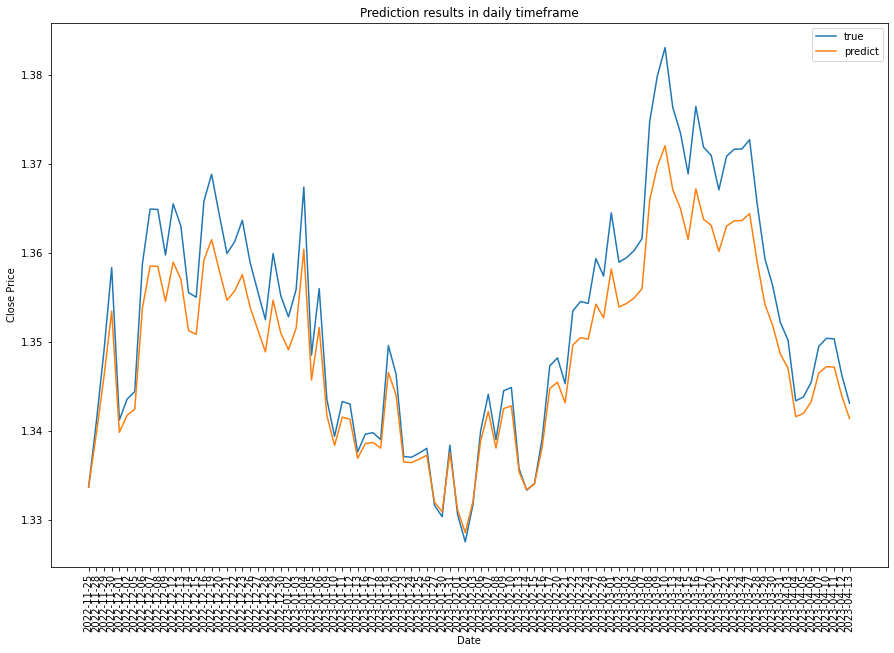

In [184]:
#visualize data

plt.figure(figsize=[15,10])
plt.title('Prediction results in daily timeframe')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.plot(test_datetime, testY)
plt.plot(test_datetime, predictedTest)
plt.legend(['true', 'predict'], loc='upper right')
plt.xticks(rotation = 90)
plt.show()


In [216]:
test_datetime

['2022-11-25',
 '2022-11-28',
 '2022-11-29',
 '2022-11-30',
 '2022-12-01',
 '2022-12-02',
 '2022-12-05',
 '2022-12-06',
 '2022-12-07',
 '2022-12-08',
 '2022-12-09',
 '2022-12-12',
 '2022-12-13',
 '2022-12-14',
 '2022-12-15',
 '2022-12-16',
 '2022-12-19',
 '2022-12-20',
 '2022-12-21',
 '2022-12-22',
 '2022-12-23',
 '2022-12-26',
 '2022-12-27',
 '2022-12-28',
 '2022-12-29',
 '2022-12-30',
 '2023-01-02',
 '2023-01-03',
 '2023-01-04',
 '2023-01-05',
 '2023-01-06',
 '2023-01-09',
 '2023-01-10',
 '2023-01-11',
 '2023-01-12',
 '2023-01-13',
 '2023-01-16',
 '2023-01-17',
 '2023-01-18',
 '2023-01-19',
 '2023-01-20',
 '2023-01-23',
 '2023-01-24',
 '2023-01-25',
 '2023-01-26',
 '2023-01-27',
 '2023-01-30',
 '2023-01-31',
 '2023-02-01',
 '2023-02-02',
 '2023-02-03',
 '2023-02-06',
 '2023-02-07',
 '2023-02-08',
 '2023-02-09',
 '2023-02-10',
 '2023-02-13',
 '2023-02-14',
 '2023-02-15',
 '2023-02-16',
 '2023-02-17',
 '2023-02-20',
 '2023-02-21',
 '2023-02-22',
 '2023-02-23',
 '2023-02-24',
 '2023-02-

In [232]:
x_input=testY[-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [229]:
temp_input = list(testY[-100:])

In [230]:
temp_input

[1.3336600065231323,
 1.3409600257873537,
 1.3489899635314941,
 1.3583600521087646,
 1.3411999940872192,
 1.3435499668121338,
 1.3444000482559204,
 1.3588000535964966,
 1.3649400472640991,
 1.36489999294281,
 1.3597700595855713,
 1.365530014038086,
 1.363029956817627,
 1.3555400371551514,
 1.3550200462341309,
 1.365820050239563,
 1.3688600063323975,
 1.364300012588501,
 1.3599400520324707,
 1.3612699508666992,
 1.3636800050735474,
 1.358970046043396,
 1.3557000160217285,
 1.3524999618530273,
 1.3599400520324707,
 1.3552000522613525,
 1.352810025215149,
 1.3559000492095947,
 1.3674099445343018,
 1.3485100269317627,
 1.3559900522232056,
 1.3435200452804565,
 1.3393700122833252,
 1.3432899713516235,
 1.343000054359436,
 1.3375999927520752,
 1.339619994163513,
 1.3397799730300903,
 1.3389999866485596,
 1.3495800495147705,
 1.3463799953460693,
 1.3371000289916992,
 1.3370100259780884,
 1.3374799489974976,
 1.3380199670791626,
 1.3316099643707275,
 1.3303200006484985,
 1.338379979133606,
 1.

In [238]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = testY.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

ValueError: cannot reshape array of size 691 into shape (1,100,1)

In [236]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=1
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

ValueError: cannot reshape array of size 100 into shape (1,1,1)

In [ ]:
################

In [239]:
close=df_pair['Close']

In [259]:
X = scaler.fit_transform(np.array(close).reshape(-1,1))
import matplotlib.pyplot as plt

look_back=100
trainPredictPlot = np.empty_like(X)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainY)+look_back, :] = trainY
# shift test predictions for plotting
testPredictPlot = np.empty_like(X)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainY)+(look_back*2)+1:len(X)-1, :] = testY
# plot baseline and predictions
plt.plot(scaler.inverse_transform(X))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: could not broadcast input array from shape (1,2767) into shape (1,1)

In [261]:
trainPredictPlot

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

In [253]:
import copy
#trainY_copy=copy.deepcopy(trainY)
trainY=copy.deepcopy(trainY_copy)

In [254]:
#trainY_copy
trainY

array([1.05120003, 1.04100001, 1.0395    , ..., 1.32195997, 1.32524002,
       1.32218003])

In [258]:
trainY=np.array([trainY]) 
trainY

array([[1.05120003, 1.04100001, 1.0395    , ..., 1.32195997, 1.32524002,
        1.32218003]])

In [260]:
X.shape

(3459, 1)

In [246]:
X

array([[0.20987181],
       [0.19005054],
       [0.18713564],
       ...,
       [0.79117759],
       [0.78322976],
       [0.7771083 ]])

In [262]:
trainY.shape

(1, 2767)

In [289]:
close = df_pair["Close"]
close.shape
close
close = close.dropna()
close.shape
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
tmp = scaler.fit(np.array(close).reshape(-1,1))
new_df = scaler.transform(np.array(close).reshape(-1,1))

 
print(new_df)
training_size=int(len(new_df)*0.67)
test_size=len(new_df)-training_size
train_data,test_data=new_df[0:training_size,:],new_df[training_size:len(new_df),:1]

print(train_data.shape)
print(test_data.shape)
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)
time_step=100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
#print(X_train, Y_train)
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print(X_train.shape, X_test.shape)
#print(X_train, Y_train)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()
model.fit(X_train,Y_train,validation_data=(X_test, Y_test),epochs=100,batch_size=64,callbacks=[earlyStop], verbose=1)
model.save(currency_pair+"_model.h5")
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
print(train_predict.shape, test_predict.shape)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
print(test_predict)
X = scaler.fit_transform(np.array(close).reshape(-1,1))




[[0.10624964]
 [0.10836716]
 [0.12201691]
 ...
 [0.64167573]
 [0.63446471]
 [0.61786765]]
(2318, 1)
(1142, 1)
(2217, 100) (2217,) (1041, 100) (1041,)
(2217, 100, 1) (1041, 100, 1)
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_15 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_31 (LSTM)              (None, 100, 50)           20200     
                                                                 
 dropout_16 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_32 (LSTM)              (None, 50)                20200     
                                                                 
 dens

35/35 [==============================] - 11s 320ms/step - loss: 3.2607e-04 - val_loss: 5.8251e-04
Epoch 64/100
35/35 [==============================] - 11s 314ms/step - loss: 3.2517e-04 - val_loss: 5.1130e-04
Epoch 65/100
35/35 [==============================] - 11s 320ms/step - loss: 3.2172e-04 - val_loss: 5.8804e-04
Epoch 66/100
35/35 [==============================] - 10s 299ms/step - loss: 3.3232e-04 - val_loss: 4.7266e-04
Epoch 67/100
35/35 [==============================] - 10s 294ms/step - loss: 3.2091e-04 - val_loss: 4.7977e-04
Epoch 68/100
35/35 [==============================] - 10s 296ms/step - loss: 3.1015e-04 - val_loss: 4.4834e-04
Epoch 69/100
35/35 [==============================] - 10s 297ms/step - loss: 2.9882e-04 - val_loss: 4.2109e-04
Epoch 70/100
35/35 [==============================] - 10s 292ms/step - loss: 3.0683e-04 - val_loss: 4.6819e-04
Epoch 71/100
35/35 [==============================] - 10s 292ms/step - loss: 3.0214e-04 - val_loss: 4.0025e-04
Epoch 72/100
3

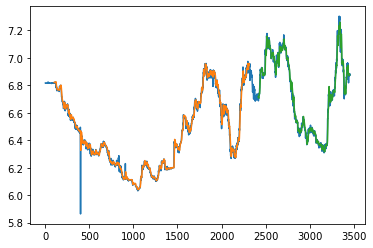

In [285]:
import matplotlib.pyplot as plt

look_back=100
trainPredictPlot = np.empty_like(X)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(X)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(X)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(X))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [265]:
#model.save(currency_pair+"_model.h5")